In [111]:
%pip install -qU pandas matplotlib seaborn python-dotenv requests

Note: you may need to restart the kernel to use updated packages.


In [269]:
import pandas as pd

In [224]:
# .csv to pandas df
imdb_soundtracks = pd.read_csv("../data/sound_track_imdb_top_250_movie_tv_series.csv")
imdb_soundtracks

,Unnamed: 0,name,year,song_name,written_by,performed_by,composed_by,lyrics_by,written_performed_by,music_by,courtesy_of,conducted_by,libretto_by,under_license_from
0,0,The Shawshank Redemption,1994,If I Didn't Care,NaN,The Ink Spots,NaN,NaN,NaN,NaN,MCA Records,NaN,NaN,NaN
1,1,The Shawshank Redemption,1994,Duettino - Sull'aria,NaN,Edith Mathis (uncredited) and Gundula Janowitz...,Wolfgang Amadeus Mozart,NaN,NaN,NaN,NaN,Karl Böhm,Lorenzo da Ponte (uncredited),NaN
2,2,The Shawshank Redemption,1994,Put The Blame On Mame,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,The Shawshank Redemption,1994,Lovesick Blues,NaN,Hank Williams,NaN,NaN,NaN,NaN,PolyGram Special Markets,NaN,NaN,NaN
4,4,The Shawshank Redemption,1994,Willie and The Hand Jive,NaN,NaN,NaN,NaN,NaN,NaN,Capitol Records,NaN,NaN,CEMA Special Markets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3128,3128,"Love, Death & Robots",2019,It looks like we don't have any Soundtracks fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3129,3129,Foyle's War,2002,It looks like we don't have any Soundtracks fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3130,3130,Jesus of Nazareth,1977,It looks like we don't have any Soundtracks fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3131,3131,Luther,2010,Paradise Circus,"Robert Del Naja, Grant Marshall, Hope Sandoval...",Massive Attack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Unnamed: 0                 0
name                       0
year                       0
song_name                  0
written_by              1622
performed_by            1472
composed_by             2902
lyrics_by               2877
written_performed_by    3020
music_by                2651
courtesy_of             2069
conducted_by            3026
libretto_by             3122
under_license_from      2976
dtype: int64


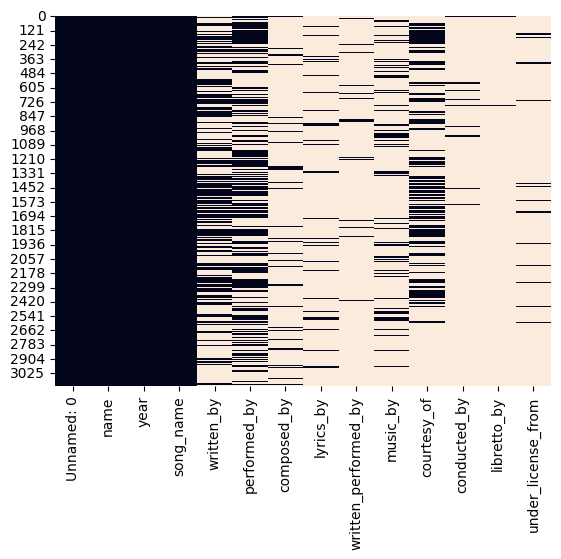

In [221]:
import seaborn as sns 
import matplotlib.pyplot as plt 

# Visualize null columns to see which fields are unnecessary
sns.heatmap(imdb_soundtracks.isnull(), cbar=False)
print(imdb_soundtracks.isna().sum())
plt.show()

In [225]:
# Drop unnecessary fields
imdb_soundtracks = imdb_soundtracks.drop(columns=['written_performed_by', 'conducted_by', 'libretto_by', 'under_license_from', 'Unnamed: 0'])

imdb_soundtracks.drop(imdb_soundtracks[imdb_soundtracks['song_name'] == "It looks like we don't have any Soundtracks for this title yet."].index, inplace = True)

# Convert to string to use for Spotify API search
imdb_soundtracks['performed_by'] = imdb_soundtracks['performed_by'].fillna("nan").astype(str)

In [228]:
imdb_soundtracks = imdb_soundtracks.reset_index(drop=True)
imdb_soundtracks

,name,year,song_name,written_by,performed_by,composed_by,lyrics_by,music_by,courtesy_of
0,The Shawshank Redemption,1994,If I Didn't Care,NaN,The Ink Spots,NaN,NaN,NaN,MCA Records
1,The Shawshank Redemption,1994,Duettino - Sull'aria,NaN,Edith Mathis (uncredited) and Gundula Janowitz...,Wolfgang Amadeus Mozart,NaN,NaN,NaN
2,The Shawshank Redemption,1994,Put The Blame On Mame,NaN,nan,NaN,NaN,NaN,NaN
3,The Shawshank Redemption,1994,Lovesick Blues,NaN,Hank Williams,NaN,NaN,NaN,PolyGram Special Markets
4,The Shawshank Redemption,1994,Willie and The Hand Jive,NaN,nan,NaN,NaN,NaN,Capitol Records
...,...,...,...,...,...,...,...,...,...
2960,Flames,2018,Khamoshiyan,Alok Ranjan Jha,Kumar Sanu and Alka Yagnik,Lalit Pandit,NaN,NaN,NaN
2961,Modern Family,2009,Circle Of Life,NaN,Elton John,NaN,NaN,NaN,NaN
2962,Modern Family,2009,Modern Family Main Theme,Gabriel Mann,nan,NaN,NaN,NaN,NaN
2963,Modern Family,2009,We're All In This Together,Matthew Gerrard and Robbie Nevil,Ty Burrell,NaN,NaN,NaN,NaN


In [126]:
from dotenv import load_dotenv
import os
from requests import post, get
import base64
import json
from urllib.parse import quote

load_dotenv()

client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

# print(client_id)
# print(client_secret)

# Token needed to search Spotify API
def get_token():
    auth_string = client_id + ":" + client_secret
    auth_bytes = auth_string.encode("utf-8")
    auth_base64 = str(base64.b64encode(auth_bytes), "utf-8")

    url = "https://accounts.spotify.com/api/token"
    headers = {
        "Authorization": "Basic " + auth_base64,
        "Content-Type": "application/x-www-form-urlencoded"
    }
    data = {"grant_type": "client_credentials"}
    result = post(url, headers=headers, data=data)

    json_result = json.loads(result.content)
    return json_result["access_token"]


In [127]:
def make_url(song_name, artist_name):
    url = "https://api.spotify.com/v1/search"
    song_name = song_name[:50]
    if(artist_name == "nan"):
        query = f'track:"{song_name}"'
    else:
        artist_name = artist_name[:50]
        query = f'track:"{song_name}" artist:"{artist_name}"'

    query = quote(query)
    query_url = f"{url}?q={query}&type=track&limit=1"
    return query_url

In [147]:
def song_data(json_result):
    title = json_result['name']
    artist = json_result['artists'][0]['name']
    album = json_result['album']['name']
    spotify_id = json_result['id']
    x = {
    "spotify_song": title,
    "spotify_artist": artist,
    "spotify_album": album,
    "spotify_id": spotify_id
    }
    return json.dumps(x)


In [157]:
def search_track(token, song_name, artist_name):
    headers = {"Authorization": "Bearer " + token}

    query_url = make_url(song_name, artist_name)
    # print(query_url)
    result = get(query_url, headers=headers)
    # print(json.loads(result.content))
    json_result = json.loads(result.content)["tracks"]["items"]

    if len(json_result) == 0 and artist_name != "nan":
        print("Trying again with only song name...")
        # print(query_url)
        query_url = make_url(song_name, "nan")  
        result = get(query_url, headers=headers)
        json_result = json.loads(result.content)["tracks"]["items"]

    if len(json_result) == 0:
        return "No track found"
    
    data = song_data(json_result[0])
    print(data)
    return data

token = get_token()
# print(token)

In [149]:
result = search_track(token, "Get Care for Me", "nan")
print(result)

https://api.spotify.com/v1/search?q=track%3A%22Get%20Care%20for%20Me%22&type=track&limit=1
No track found
None


In [150]:
imdb_soundtracks.iat[0, 5]
result = search_track(token, imdb_soundtracks.iat[4, 3], imdb_soundtracks.iat[4, 5])
print(result)

https://api.spotify.com/v1/search?q=track%3A%22Willie%20and%20The%20Hand%20Jive%20%22&type=track&limit=1
{"spotify_song": "Willie And The Hand Jive", "spotify_artist": "Johnny Otis", "spotify_album": "Ring A Ling", "spotify_id": "4BW5ZIAegQxpKtUyR5eLh6"}


In [167]:
# spotify_soundtrack_results = []

In [ ]:
# start = 0

# Marking this out bc I don't want to accidently run it
# for index, row in imdb_soundtracks.iloc[start:].iterrows(): 
#     song_name = row['song_name']
#     artist_name = row['performed_by']
#     print(f'Index: {index}, Get {song_name} by {artist_name}')
    
#     data = search_track(token, song_name, artist_name)

#     spotify_soundtrack_results.append(data)

In [174]:
# print(spotify_soundtrack_results)

['{"spotify_song": "If I Didn\'t Care", "spotify_artist": "The Ink Spots", "spotify_album": "The Anthology", "spotify_id": "2jPgfwVXOKnUl2QLQsnIAT"}', '{"spotify_song": "The Marriage of Figaro / \\"Duettino\\" Sull \'Aria", "spotify_artist": "Wolfgang Amadeus Mozart", "spotify_album": "The Shawshank Redemption", "spotify_id": "4CZWCG1KOEZPGdQqDL85VF"}', '{"spotify_song": "Put the Blame on Mame", "spotify_artist": "Jazz At The Movies", "spotify_album": "Kiss Kiss Bang Bang", "spotify_id": "34M8EsL4rqmzUCeX9PVKgM"}', '{"spotify_song": "Lovesick Blues", "spotify_artist": "Hank Williams", "spotify_album": "Moanin\' The Blues (Expanded Edition)", "spotify_id": "1x4iqHqbgf9oHsQJ6FGnCy"}', '{"spotify_song": "Willie And The Hand Jive", "spotify_artist": "Johnny Otis", "spotify_album": "Ring A Ling", "spotify_id": "4BW5ZIAegQxpKtUyR5eLh6"}', '{"spotify_song": "A Mighty Fortress Is Our God", "spotify_artist": "Chris Rice", "spotify_album": "Peace Like A River: The Hymns Project", "spotify_id": "

In [172]:
import pickle

# with open('../data/spotify-soundtrack-results.pkl', 'wb') as f:
#     pickle.dump(spotify_soundtrack_results, f)

In [176]:
with open('../data/spotify-soundtrack-results.pkl', 'rb') as f:
    spotify_data = pickle.load(f)

print(spotify_data)

['{"spotify_song": "If I Didn\'t Care", "spotify_artist": "The Ink Spots", "spotify_album": "The Anthology", "spotify_id": "2jPgfwVXOKnUl2QLQsnIAT"}', '{"spotify_song": "The Marriage of Figaro / \\"Duettino\\" Sull \'Aria", "spotify_artist": "Wolfgang Amadeus Mozart", "spotify_album": "The Shawshank Redemption", "spotify_id": "4CZWCG1KOEZPGdQqDL85VF"}', '{"spotify_song": "Put the Blame on Mame", "spotify_artist": "Jazz At The Movies", "spotify_album": "Kiss Kiss Bang Bang", "spotify_id": "34M8EsL4rqmzUCeX9PVKgM"}', '{"spotify_song": "Lovesick Blues", "spotify_artist": "Hank Williams", "spotify_album": "Moanin\' The Blues (Expanded Edition)", "spotify_id": "1x4iqHqbgf9oHsQJ6FGnCy"}', '{"spotify_song": "Willie And The Hand Jive", "spotify_artist": "Johnny Otis", "spotify_album": "Ring A Ling", "spotify_id": "4BW5ZIAegQxpKtUyR5eLh6"}', '{"spotify_song": "A Mighty Fortress Is Our God", "spotify_artist": "Chris Rice", "spotify_album": "Peace Like A River: The Hymns Project", "spotify_id": "

In [239]:
imdb_soundtracks

,name,year,song_name,written_by,performed_by,composed_by,lyrics_by,music_by,courtesy_of
0,The Shawshank Redemption,1994,If I Didn't Care,NaN,The Ink Spots,NaN,NaN,NaN,MCA Records
1,The Shawshank Redemption,1994,Duettino - Sull'aria,NaN,Edith Mathis (uncredited) and Gundula Janowitz...,Wolfgang Amadeus Mozart,NaN,NaN,NaN
2,The Shawshank Redemption,1994,Put The Blame On Mame,NaN,nan,NaN,NaN,NaN,NaN
3,The Shawshank Redemption,1994,Lovesick Blues,NaN,Hank Williams,NaN,NaN,NaN,PolyGram Special Markets
4,The Shawshank Redemption,1994,Willie and The Hand Jive,NaN,nan,NaN,NaN,NaN,Capitol Records
...,...,...,...,...,...,...,...,...,...
2960,Flames,2018,Khamoshiyan,Alok Ranjan Jha,Kumar Sanu and Alka Yagnik,Lalit Pandit,NaN,NaN,NaN
2961,Modern Family,2009,Circle Of Life,NaN,Elton John,NaN,NaN,NaN,NaN
2962,Modern Family,2009,Modern Family Main Theme,Gabriel Mann,nan,NaN,NaN,NaN,NaN
2963,Modern Family,2009,We're All In This Together,Matthew Gerrard and Robbie Nevil,Ty Burrell,NaN,NaN,NaN,NaN


In [229]:
# 2964 last index
spotify_data[6]

In [242]:
spotify_soundtracks_df = pd.DataFrame(spotify_data)
spotify_soundtracks_df

,0
0,"{""spotify_song"": ""If I Didn't Care"", ""spotify_..."
1,"{""spotify_song"": ""The Marriage of Figaro / \""D..."
2,"{""spotify_song"": ""Put the Blame on Mame"", ""spo..."
3,"{""spotify_song"": ""Lovesick Blues"", ""spotify_ar..."
4,"{""spotify_song"": ""Willie And The Hand Jive"", ""..."
...,...
2960,"{""spotify_song"": ""Khamoshiyan"", ""spotify_artis..."
2961,"{""spotify_song"": ""Circle Of Life"", ""spotify_ar..."
2962,"{""spotify_song"": ""Modern Family Main Theme (Fr..."
2963,"{""spotify_song"": ""We're All In This Together"",..."


In [246]:
import numpy as np

spotify_soundtracks_df[0] = spotify_soundtracks_df[0].replace({None: '{}', np.nan: '{}'})

In [247]:
spotify_soundtracks_df = spotify_soundtracks_df[0].apply(json.loads).apply(pd.Series)
spotify_soundtracks_df

,spotify_song,spotify_artist,spotify_album,spotify_id
0,If I Didn't Care,The Ink Spots,The Anthology,2jPgfwVXOKnUl2QLQsnIAT
1,"The Marriage of Figaro / ""Duettino"" Sull 'Aria",Wolfgang Amadeus Mozart,The Shawshank Redemption,4CZWCG1KOEZPGdQqDL85VF
2,Put the Blame on Mame,Jazz At The Movies,Kiss Kiss Bang Bang,34M8EsL4rqmzUCeX9PVKgM
3,Lovesick Blues,Hank Williams,Moanin' The Blues (Expanded Edition),1x4iqHqbgf9oHsQJ6FGnCy
4,Willie And The Hand Jive,Johnny Otis,Ring A Ling,4BW5ZIAegQxpKtUyR5eLh6
...,...,...,...,...
2960,Khamoshiyan,Jeet Gannguli,Khamoshiyan (Original Motion Picture Soundtrack),6zCQF5tu7HVwU9shhKqiuF
2961,Circle Of Life,Elton John,Love Songs,7em38Hh2sKwnZ1HDgxvg82
2962,"Modern Family Main Theme (From ""Modern Family"")",Geek Music,"Modern Family Main Theme (From ""Modern Family"")",32A852iC0NyF9xvOXTadtF
2963,We're All In This Together,High School Musical Cast,High School Musical,0cqNGWvuukhCiKvEX7utys


In [272]:
imdb_spotify_soundtracks = pd.concat([imdb_soundtracks, spotify_soundtracks_df], axis=1)
imdb_spotify_soundtracks = imdb_spotify_soundtracks.drop(columns = ['composed_by', 'lyrics_by', 'music_by', 'courtesy_of'])

In [273]:
imdb_spotify_soundtracks.head(10)

,name,year,song_name,written_by,performed_by,spotify_song,spotify_artist,spotify_album,spotify_id
0,The Shawshank Redemption,1994,If I Didn't Care,NaN,The Ink Spots,If I Didn't Care,The Ink Spots,The Anthology,2jPgfwVXOKnUl2QLQsnIAT
1,The Shawshank Redemption,1994,Duettino - Sull'aria,NaN,Edith Mathis (uncredited) and Gundula Janowitz...,"The Marriage of Figaro / ""Duettino"" Sull 'Aria",Wolfgang Amadeus Mozart,The Shawshank Redemption,4CZWCG1KOEZPGdQqDL85VF
2,The Shawshank Redemption,1994,Put The Blame On Mame,NaN,nan,Put the Blame on Mame,Jazz At The Movies,Kiss Kiss Bang Bang,34M8EsL4rqmzUCeX9PVKgM
3,The Shawshank Redemption,1994,Lovesick Blues,NaN,Hank Williams,Lovesick Blues,Hank Williams,Moanin' The Blues (Expanded Edition),1x4iqHqbgf9oHsQJ6FGnCy
4,The Shawshank Redemption,1994,Willie and The Hand Jive,NaN,nan,Willie And The Hand Jive,Johnny Otis,Ring A Ling,4BW5ZIAegQxpKtUyR5eLh6
5,The Shawshank Redemption,1994,A Mighty Fortress Is Our God,Martin Luther,Bob Gunton,A Mighty Fortress Is Our God,Chris Rice,Peace Like A River: The Hymns Project,7lmwDlkBDwPwMO75wHVbl2
6,The Godfather,1972,Mall Wedding Sequence,NaN,nan,NaN,NaN,NaN,NaN
7,The Godfather,1972,I Have But One Heart,NaN,Al Martino (uncredited),I Have But One Heart,Al Martino,The Godfather,4rTozJf2UY14LNG6Q3E321
8,The Godfather,1972,Luna mezz' 'o mare,NaN,Morgana King (uncredited),Luna Mezz 'O Mare,Patrizio Buanne,Forever Begins Tonight,29mowJjsbQNQVgkGBt2NEI
9,The Godfather,1972,Manhattan Serenade,NaN,Tommy Dorsey & His Orchestra (uncredited),Manhattan Serenade,Tommy Dorsey,The Incomparable Tommy Dorsey,6AsCaYsDYoyU2PEFbSLgpf


In [274]:
imdb_spotify_soundtracks.dropna(subset = ['spotify_song', 'spotify_artist', 'spotify_id'], inplace=True)
imdb_spotify_soundtracks

,name,year,song_name,written_by,performed_by,spotify_song,spotify_artist,spotify_album,spotify_id
0,The Shawshank Redemption,1994,If I Didn't Care,NaN,The Ink Spots,If I Didn't Care,The Ink Spots,The Anthology,2jPgfwVXOKnUl2QLQsnIAT
1,The Shawshank Redemption,1994,Duettino - Sull'aria,NaN,Edith Mathis (uncredited) and Gundula Janowitz...,"The Marriage of Figaro / ""Duettino"" Sull 'Aria",Wolfgang Amadeus Mozart,The Shawshank Redemption,4CZWCG1KOEZPGdQqDL85VF
2,The Shawshank Redemption,1994,Put The Blame On Mame,NaN,nan,Put the Blame on Mame,Jazz At The Movies,Kiss Kiss Bang Bang,34M8EsL4rqmzUCeX9PVKgM
3,The Shawshank Redemption,1994,Lovesick Blues,NaN,Hank Williams,Lovesick Blues,Hank Williams,Moanin' The Blues (Expanded Edition),1x4iqHqbgf9oHsQJ6FGnCy
4,The Shawshank Redemption,1994,Willie and The Hand Jive,NaN,nan,Willie And The Hand Jive,Johnny Otis,Ring A Ling,4BW5ZIAegQxpKtUyR5eLh6
...,...,...,...,...,...,...,...,...,...
2960,Flames,2018,Khamoshiyan,Alok Ranjan Jha,Kumar Sanu and Alka Yagnik,Khamoshiyan,Jeet Gannguli,Khamoshiyan (Original Motion Picture Soundtrack),6zCQF5tu7HVwU9shhKqiuF
2961,Modern Family,2009,Circle Of Life,NaN,Elton John,Circle Of Life,Elton John,Love Songs,7em38Hh2sKwnZ1HDgxvg82
2962,Modern Family,2009,Modern Family Main Theme,Gabriel Mann,nan,"Modern Family Main Theme (From ""Modern Family"")",Geek Music,"Modern Family Main Theme (From ""Modern Family"")",32A852iC0NyF9xvOXTadtF
2963,Modern Family,2009,We're All In This Together,Matthew Gerrard and Robbie Nevil,Ty Burrell,We're All In This Together,High School Musical Cast,High School Musical,0cqNGWvuukhCiKvEX7utys


In [275]:
imdb_spotify_soundtracks.isna().sum()

name                 0
year                 0
song_name            0
written_by        1333
performed_by         0
spotify_song         0
spotify_artist       0
spotify_album        0
spotify_id           0
dtype: int64